In [ ]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
import numpy as np

# num_words 仅保留训练数据的中前10000个最常见的高频单词
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 将训练数据、测试数据向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
# 将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_labels = np.asarray(test_labels).astype('float32')

模型定义

In [5]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

编译模型


In [6]:
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

配置优化器


In [7]:
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

使用自定义的损失和指标


In [8]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

留出验证集

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

训练模型

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5095 - binary_accuracy: 0.7875 - val_loss: 0.3934 - val_binary_accuracy: 0.8521
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2988 - binary_accuracy: 0.9029 - val_loss: 0.3062 - val_binary_accuracy: 0.8844

history中的内容

In [11]:
# history_dict = history.history
# history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

绘制训练损失和验证损失

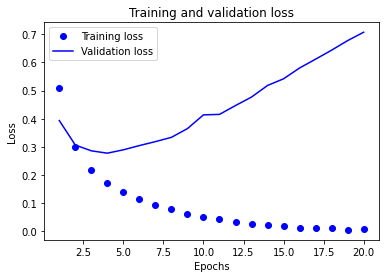

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

# 'bo' 表示蓝色圆点
# 'b' 表示蓝色实线
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

绘制训练精度和验证精度

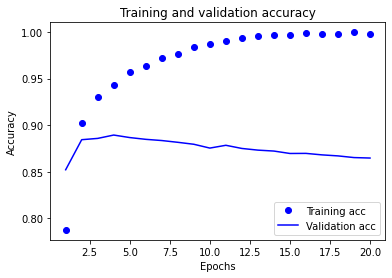

In [15]:
# 清空图像
plt.clf()

# key可以改变（版本可能不一样）
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()